# Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

import pickle

# Regression with data which is not transformed
##### Using features correlated with the SalePrice more than 0.5 and not correlated with other features more than 0.8
##### Plus using labeled categorical features which looked like they would affect the SalePrice

### Linear regression

In [2]:
train = pd.read_csv('../datasets/train_incl_dummy.csv')

In [3]:
X = train[
    [
        'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', 'Year Built',
        'Fireplaces', 'Exter Qual', 'Kitchen Qual'
    ]
]
y = train['SalePrice']

X_features = [
    'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', 'Year Built',
    'Fireplaces', 'Exter Qual', 'Kitchen Qual'
]

# These data hardly affected the score. That's why they are excluded.
''','Heating QC', 'Street_Pave',
       'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL',
       'MS Zoning_RM' '''

",'Heating QC', 'Street_Pave',\n       'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL',\n       'MS Zoning_RM' "

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# saves the scaler for predictions
filename = '../models/normal_data_scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [6]:
lr = LinearRegression()

In [7]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.851616446154827

In [8]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lr.score(X_test, y_test)

0.8594347984928954

### Ridge regression

In [10]:
r_alphas = np.logspace(0, 5, 100)
ridge = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

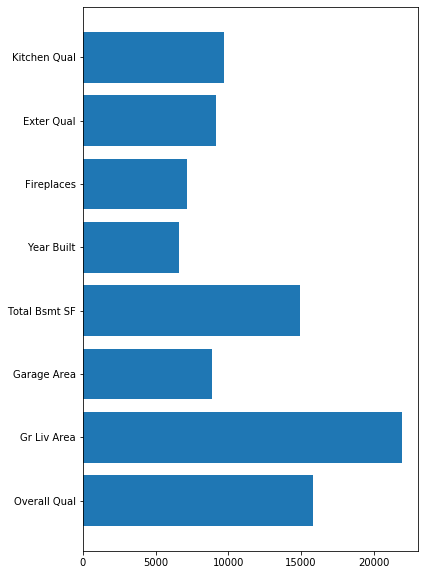

In [11]:
plt.figure(figsize=(6, 10));
plt.barh(X_features, ridge.coef_);

In [12]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8564663187109749
0.8593016249640927


### Lasso regression

In [13]:
l_alphas = np.logspace(0, 5, 100)
lasso = LassoCV(alphas=l_alphas, cv=5)

lasso.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

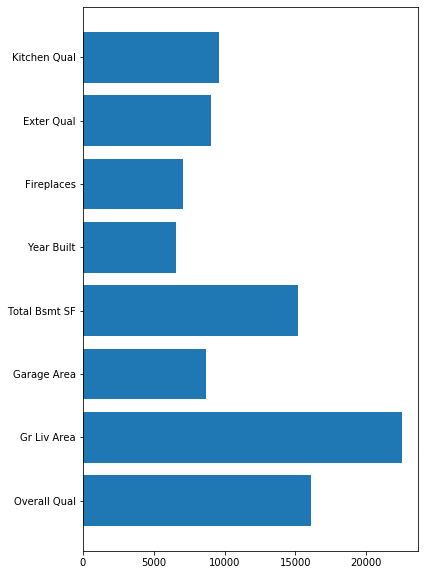

In [14]:
plt.figure(figsize=(6, 10));
plt.barh(X_features, lasso.coef_);

In [15]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8565412364122651
0.8594351023689096


### Save one model

In [16]:
filename = '../models/normal_data_lasso_model.sav'
pickle.dump(lasso, open(filename, 'wb'))

# Regression with log transformed data

In [17]:
log_train = pd.read_csv('../datasets/train_log_transform.csv')

In [18]:
log_X = log_train[
    [
        'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', 'Year Built',
        'Fireplaces', 'Exter Qual', 'Kitchen Qual'
    ]
]

log_y = log_train['SalePrice']

In [19]:
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(log_X, log_y, random_state=0)

In [20]:
scaler = StandardScaler()
scaler.fit(log_X_train)

log_X_train = scaler.transform(log_X_train)
log_X_test = scaler.transform(log_X_test)

# saves the scaler for predictions
filename = '../models/log_data_scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [21]:
lr_log = LinearRegression()

In [22]:
cross_val_score(lr_log, log_X_train, log_y_train, cv=5).mean()

0.8637865926967443

In [23]:
lr_log.fit(log_X_train, log_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lr_log.score(log_X_test, log_y_test)

0.8567862069802167

### Ridge regression

In [25]:
r_alphas = np.logspace(0, 5, 100)
ridge_log = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

ridge_log.fit(log_X_train, log_y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

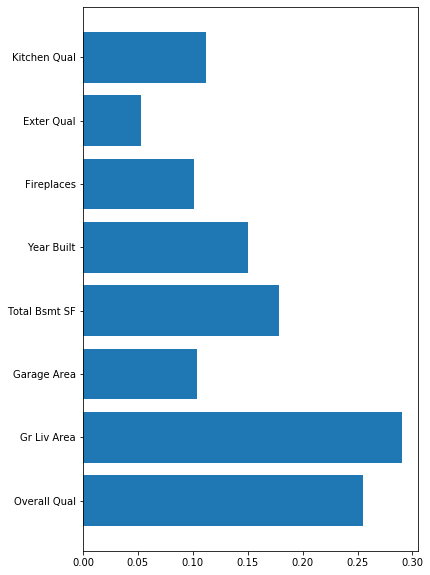

In [26]:
plt.figure(figsize=(6, 10));
plt.barh(X_features, ridge_log.coef_);

In [27]:
print(ridge_log.score(log_X_train, log_y_train))
print(ridge_log.score(log_X_test, log_y_test))

0.867453632821924
0.8572743182450453


### Lasso regression 
##### I do not know why the coefs are 0s

In [28]:
l_alphas = np.logspace(0, 5, 1000)
lasso_log = LassoCV(alphas=l_alphas, cv=5)

lasso_log.fit(log_X_train, log_y_train)

LassoCV(alphas=array([1.00000000e+00, 1.01159111e+00, 1.02331658e+00, 1.03517796e+00,
       1.04717682e+00, 1.05931476e+00, 1.07159340e+00, 1.08401436e+00,
       1.09657929e+00, 1.10928986e+00, 1.12214777e+00, 1.13515471e+00,
       1.14831241e+00, 1.16162263e+00, 1.17508713e+00, 1.18870770e+00,
       1.20248614e+00, 1.21642429e+00, 1.23052400e+00, 1.24478715e+00,
       1.25921561e+00, 1.27381132e+0...
       8.80937190e+04, 8.91148232e+04, 9.01477631e+04, 9.11926760e+04,
       9.22497005e+04, 9.33189772e+04, 9.44006479e+04, 9.54948564e+04,
       9.66017480e+04, 9.77214697e+04, 9.88541702e+04, 1.00000000e+05]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

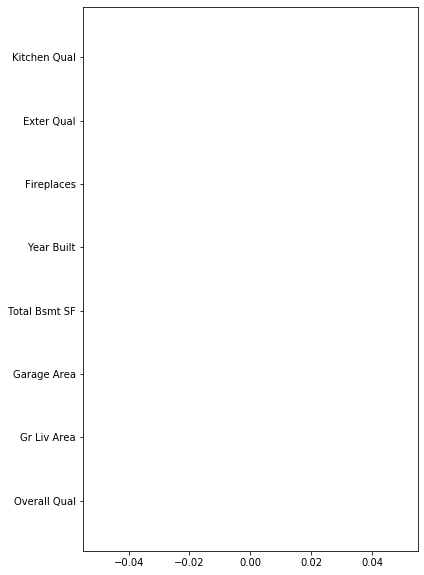

In [29]:
plt.figure(figsize=(6, 10));
plt.barh(X_features, lasso_log.coef_);

In [30]:
print(lasso_log.score(log_X_train, log_y_train))
print(lasso_log.score(log_X_test, log_y_test))

0.0
-3.2619112709575404e-05


In [31]:
lasso_log.coef_

array([0., 0., 0., 0., 0., 0., 0., 0.])

### Save one model

In [32]:
filename = '../models/log_data_ridge_model.sav'
pickle.dump(ridge_log, open(filename, 'wb'))

# Regression with polynomial data

In [33]:
poly_train = pd.read_csv('../datasets/train_polynomial.csv')

In [34]:
features = np.load('../datasets/polynomial_features_for_modeling.npy')

In [35]:
poly_X = poly_train[features]

In [36]:
poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(poly_X, y, random_state=0)

In [37]:
scaler = StandardScaler()
scaler.fit(poly_X_train)

poly_X_train = scaler.transform(poly_X_train)
poly_X_test = scaler.transform(poly_X_test)

# saves the scaler for predictions
filename = '../models/poly_data_scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [38]:
lr_poly = LinearRegression()

In [39]:
cross_val_score(lr, poly_X_train, poly_y_train, cv=5).mean()

0.9128990163268161

In [40]:
lr_poly.fit(poly_X_train, poly_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lr_poly.score(poly_X_test, poly_y_test)

0.9119143405117555

### Ridge regression

In [42]:
r_alphas = np.logspace(0, 5, 100)
ridge_poly = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

ridge_poly.fit(poly_X_train, poly_y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [43]:
ridge.alpha_

41.32012400115337

In [44]:
print(ridge_poly.score(poly_X_train, poly_y_train))
print(ridge_poly.score(poly_X_test, poly_y_test))

0.921660620411276
0.912823795199542


In [45]:
ridge_poly.coef_

array([23763.21296831, 10519.29994005,  7300.70571892,  9190.89532363,
        3304.01874717,  3376.97920235,  3408.18294757,  -654.58847958,
       -2884.02238166,  6122.03035129,  1777.27707565,  3767.20081098,
        9930.07866139, -5895.12349389, 10197.92328493,  4050.54968213,
        1119.76148885, -2557.58966375, -3027.28595351,  3088.98578096,
       -2653.07654123, -1073.57057513, -3247.44266124,  4209.44615731,
        4017.74706481,  2247.46684307,  4251.51639018, -2239.09294459,
        -794.74386308, -1748.63839856,   949.56415978,   131.67050112,
        2997.36456879,   886.54243398, -2035.59943425])

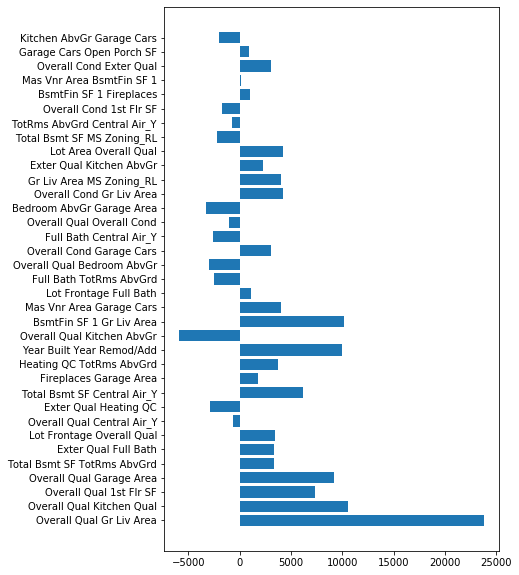

In [47]:
plt.figure(figsize=(6, 10));
plt.barh(features, ridge_poly.coef_);

### Lasso regression

In [48]:
l_alphas = np.logspace(0, 5, 100)
lasso_poly = LassoCV(alphas=l_alphas, cv=5)

lasso_poly.fit(poly_X_train, poly_y_train)

LassoCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [49]:
print(lasso_poly.score(poly_X_train, poly_y_train))
print(lasso_poly.score(poly_X_test, poly_y_test))

0.9214591665809908
0.9130644364805294


In [50]:
lasso_poly_score = [lasso_poly.score(poly_X_test, poly_y_test)]
np.save('../datasets/lasso_poly_r2score.npy', lasso_poly_score)

In [51]:
lasso_poly.coef_

array([30542.45588242,  9906.04875581,  5107.60363162,  7551.54368114,
        2193.33511513,     0.        ,  3357.1640612 , -1618.81786466,
           0.        ,  5350.61266532,  1745.91557902,  1640.41671958,
        9781.12842868, -6101.01905502, 10351.68199964,  3914.61681504,
         947.36710654,    -0.        , -3845.43300426,  1958.33119501,
       -1701.59611556,    -0.        , -2083.50551861,   488.90308248,
        1978.79095582,  1477.12784555,  4200.36945759,     0.        ,
          -0.        ,    73.61688169,   758.9386892 ,   170.28588229,
        3612.34228062,   836.63154761,  -692.59471642])

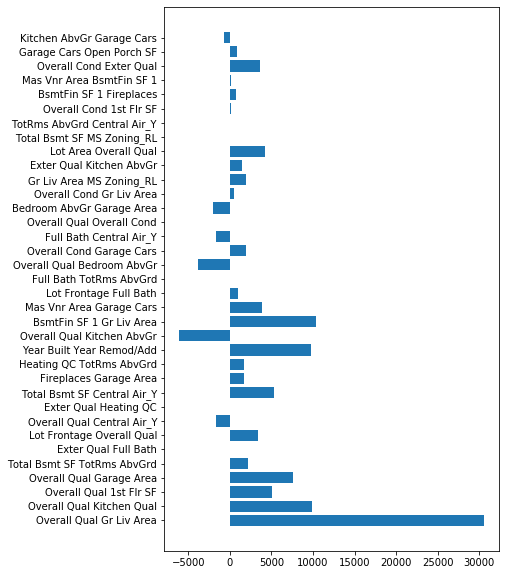

In [52]:
plt.figure(figsize=(6, 10));
plt.barh(features, lasso_poly.coef_);


### Save one model

In [ ]:
filename = '../models/poly_data_lasso_model.sav'
pickle.dump(lasso_poly, open(filename, 'wb'))

# Summary
As a result, the regression model using polynomial features got the highest score. One of the reasons would be that the number of features highly correlated to the SalePrice increased making polynomial features. There might be a reason that the SalePrice is explained with not only each factor but interactive factors. I chose the lasso regression model using polynomial data as the production model since it had the highest score and cut out some features for the model.

|  | Linear Regression | Ridge Regression | Lasso Regression |
|:---------|:---------|:---------|:---------|
| Model using training data including dummy | 0.8594 | 0.8593 | 0.8594 |
| Model using training data log transformed | 0.8567 | 0.8572 | Failed to make a model |
| Model using training data polynomial | 0.9119 | 0.9128 | 0.9130 |